<div align="center">

# 📌 Project 2

## 📚 Modelos de Crédito 

### Sofía Hernández Zatarain
### Alejandra Elizabeth Figueroa Arellano
### Patrick Fernandez Barcena Vazquez
### Axel Santiago Molina Ceja


#### 🎓 Professor: Rodolfo Slay

</div>

### Libraries

📦 Se importan las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

### Data Visualization

In [2]:
data = pd.read_csv('Medicalpremium.csv')
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


## Search for nulls and duplicates

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
data[data.duplicated()]
num_duplicados = data.duplicated(keep=False).sum()
print("Number of duplicates:", num_duplicados)

Number of duplicates: 0


## Feature Selection and Data Preparation

In [5]:
X = data.drop(columns=['PremiumPrice'])
y = data['PremiumPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Winsorization for outliers

In [6]:
for col in X_train.select_dtypes(include=['float64', 'int64']).columns:
    lower, upper = np.percentile(X_train[col], [1, 99])
    X_train[col] = np.clip(X_train[col], lower, upper)
    X_test[col] = np.clip(X_test[col], lower, upper)

## Data Standarization
Se aplica `StandardScaler` para normalizar las variables numéricas, lo cual mejora el rendimiento de algunos modelos.

In [7]:
scaler = StandardScaler()
X_train[X_train.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X_train[X_train.select_dtypes(include=['float64', 'int64']).columns])
X_test[X_test.select_dtypes(include=['float64', 'int64']).columns] = scaler.transform(X_test[X_test.select_dtypes(include=['float64', 'int64']).columns])

## Premium Price Distribution

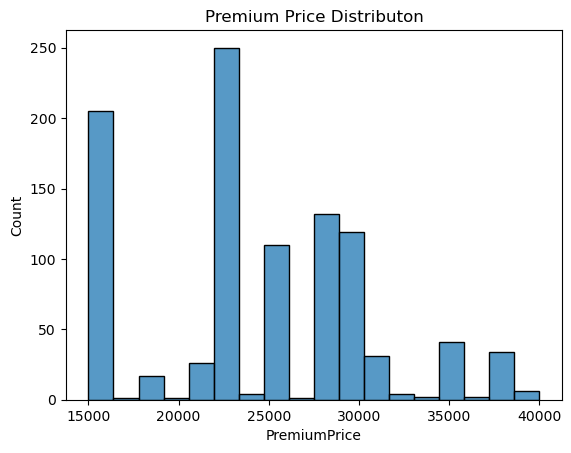

In [8]:
sns.histplot(x=data["PremiumPrice"])
plt.title("Premium Price Distributon")
plt.show()

### Model Training
Se entrenan varios modelos: Regresión Linear, Random Forest, Gradient Boosting y XGBoost.

In [9]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)

lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

### Model Testing

In [10]:
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)
y_pred_gb = gb_reg.predict(X_test)
y_pred_xgb = xgb_reg.predict(X_test)

### Evaluation (MSE and R²)
Se evalúa el rendimiento de los modelos utilizando `MSE` and `R²`

In [11]:
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} → MSE: {mse:.2f}, R²: {r2:.4f}')

evaluate(y_test, y_pred_lin, 'LinearRegression')
evaluate(y_test, y_pred_rf, 'RandomForest')
evaluate(y_test, y_pred_gb, 'GradientBoosting')
evaluate(y_test, y_pred_xgb, 'XGBoost')

LinearRegression → MSE: 12222071.45, R²: 0.7134
RandomForest → MSE: 5301975.76, R²: 0.8757
GradientBoosting → MSE: 5719870.71, R²: 0.8659
XGBoost → MSE: 8422725.68, R²: 0.8025


### Stacking model to combine all four previous models

In [12]:
meta_model = LinearRegression()

stacking_model = StackingRegressor(
    estimators=[('lin_reg', lin_reg), ('rf', rf_reg), ('gb', gb_reg), ('xgb', xgb_reg)],
    final_estimator=meta_model
)

stacking_model.fit(X_train, y_train)


StackingRegressor(estimators=[('lin_reg', LinearRegression()),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=Fals...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                  final_estimator=LinearRegression())

### Stacking model testing

In [13]:
y_pred_stacking = stacking_model.predict(X_test)
evaluate(y_test, y_pred_stacking, 'Stacking Model')

Stacking Model → MSE: 4883764.43, R²: 0.8855


### Plot real vs predicted

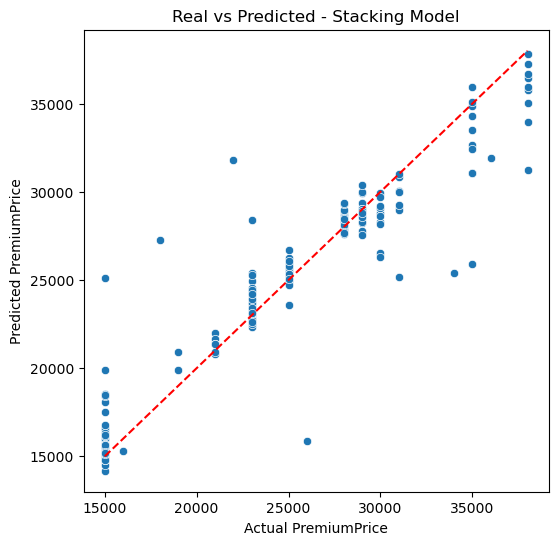

In [14]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_stacking)
plt.xlabel('Actual PremiumPrice')
plt.ylabel('Predicted PremiumPrice')
plt.title('Real vs Predicted - Stacking Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

### Cross Validation

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=kf, scoring='r2')
print(f'Stacking Cross-validation R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Stacking Cross-validation R²: 0.7542 ± 0.0864


## Model Optimization
#### Using GridSearchCV

In [ ]:
# Definir el modelo base
meta_model = LinearRegression()

stacking_model = StackingRegressor(
    estimators=[('lin_reg', lin_reg), ('rf', rf_reg), ('gb', gb_reg), ('xgb', xgb_reg)],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Hiperparámetros para buscar
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10],
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.01, 0.1],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [3, 6]
}

# GridSearch con scoring negativo RMSE (porque scikit-learn lo minimiza)
grid = GridSearchCV(estimator=stacking_model,
                    param_grid=param_grid,
                    scoring='neg_root_mean_squared_error',
                    cv=3,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)

# Evaluación
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
metrics = {
    "RMSE": rmse,
    "MSE": mse,
    "MAE": mae,
    "R² Score": r2
}
metrics_df = pd.DataFrame(metrics, index=["Score"]).T
display(metrics_df)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mejores hiperparámetros encontrados:
{'gb__learning_rate': 0.01, 'gb__n_estimators': 200, 'rf__max_depth': 10, 'rf__n_estimators': 200, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3}


,Score
RMSE,2.095136e+03
MSE,4.389596e+06
MAE,1.108195e+03
R² Score,8.970613e-01


## Prediction using Random Forest

In [23]:
new_client = pd.read_csv('/Users/axelmolina/Desktop/Noveno Semestre/Modelos/Segundo Proyecto/Healthcare_Client.csv')

new_client_scaled = scaler.transform(new_client)

# Predicción
credit_category = rf_reg.predict(new_client_scaled)
print(f"Predicted Credit Category: {credit_category[0]}")

Predicted Credit Category: 24660.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
